In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Terminology
- Population: A complete set of items or events with at least one common characteristic
- Parameter: A descriptive measure of a population
- Sample: A subset drawn from a population
- Statistic: A descriptive measure calculated from a sample that estimates a parameter
- Variable: A characteristic of a population or sample
- Data: A collection of observed values of a variable


## Types of variables
1. Categorical variables 
2. Numerical variables


## 1. Categorical variables
Classifies qualitative data in different categories.
- Gender: Male of Female
- Home language: Xhosa, Sesotho, Venda, Zulu
### Measurement scales
#### Norminal 
- Scales categories that are of equal importance.
- Categories are unordered:
    - Soda drink: (Coke, Pepsi, Twizza)
    - Gender: (Male, Female)
#### Ordinal 
- Scales categories that have a natural order.
- Categories are ordered:
    - Size: (small=1, medium=3, large=3)
    
    
### Summarizing single categorical variables
#### Categorical frequency table
- Shows the frequency of a catergorical variable in a data sample.
- Measures the relative importance of different catergorical variables.

#### Example
Taken from Applied Business Statistics, Wegner T<br>
A market research company conducted a survey amongst grocery shoppers to identify<br>
their demographic profile and shopping patterns. A random sample of 30 grocery<br>
shoppers was asked to complete a questionnaire that identified:
- at which grocery store they most preferred to shop
- the number of visits to the grocery store in the last month
- the amount spent last month on grocery purchases
- their age, gender and family size.

In [2]:
grocery_df = pd.read_excel('data/grocery.xlsx')
grocery_df.Store.replace([1, 2, 3], ['Checkers', 'Pick N Pay', 'Spar'], inplace=True)
grocery_df.Gender.replace([1, 2], ['Female', 'Male'], inplace=True)
grocery_df.head()

,Customer,Store,Visits,Spend,Family Size,Age,Gender
0,1,Pick N Pay,3,946,2,26,Female
1,2,Pick N Pay,5,1842,5,45,Male
2,3,Checkers,3,885,2,32,Female
3,4,Pick N Pay,4,1332,3,33,Female
4,5,Pick N Pay,3,744,2,65,Male


##### Questions?
1. Which grocery store is most preferred by shoppers?
2. What percentage of shoppers prefer this store?
3. What percentage of shoppers prefer to shop at Spar grocery stores?

In [3]:
freq_store = grocery_df['Store'].value_counts().values
rel_freq_store = grocery_df['Store'].value_counts(normalize=True).round(decimals=3).values
perc_freq_store = rel_freq_store*100 
stores = grocery_df['Store'].value_counts().index
data = {
    'Preferred Store': stores,
    'Frequency': freq_store,
    'Percentage': perc_freq_store,
}

pref_df = pd.DataFrame(data)
pref_df.loc['Total']= pref_df.sum(numeric_only=True)
pref_df

,Preferred Store,Frequency,Percentage
0,Pick N Pay,17.0,56.7
1,Checkers,10.0,33.3
2,Spar,3.0,10.0
Total,NaN,30.0,100.0


From the frequency table,
1. Pick N Pay has the highest frequency and therfore is the preferred store.
2. 56.7% of customers prefer Pick N Pay
3. 10% of shoppers prefer Spar

A categorical frequency table can be displayed graphically either as a:
- bar chart  
- pie chart

Text(0.5, 1.0, '% Frequency pie chart')

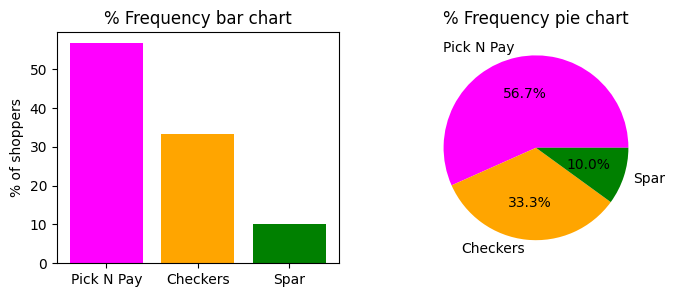

In [4]:
plt.rcParams["figure.figsize"] = (8,3)

color = ['magenta','orange','green']
#bar chart
plt.subplot(1, 2, 1)
plt.yticks([0, 10, 20,30,40,50,60])
plt.ylabel("% of shoppers")
plt.bar(stores,perc_freq_store,color=color)
plt.title("% Frequency bar chart")

#pie chart
plt.subplot(1, 2, 2)
plt.pie(freq_store,labels=stores,colors=color, autopct='%0.1f%%')
plt.title("% Frequency pie chart")

### Summarizing Two categorical variables
#### Cross-tabulation table (Contingency table)
- Summarizes the joint responses of two categorical variables.
- Examines the association between joint categorical variables.
- Table has m by n cells where:
    - m: m rows of first variable
    - n: n columns of second variable

In [5]:
crosstab_df = pd.crosstab(grocery_df['Store'],grocery_df['Gender'])
crosstab_df.index,crosstab_df.columns = ['Checkers', 'Pick N Pay','Spar'], ['Female', 'Male']

crosstab_df.loc['Column_Total']= crosstab_df.sum(numeric_only=True, axis=0)
crosstab_df.loc[:,'Row_Total'] = crosstab_df.sum(numeric_only=True, axis=1)
crosstab_df

,Female,Male,Row_Total
Checkers,7,3,10
Pick N Pay,10,7,17
Spar,2,1,3
Column_Total,19,11,30


Cross-tabulated Tables can be displayed as:
- Stacked bar chart
- Multiple bar chart

Text(0.5, 1.0, 'Multiple bar chart')

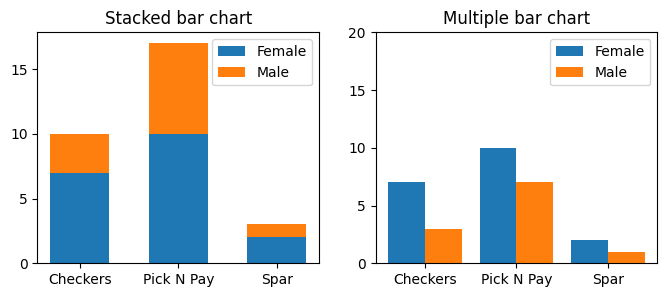

In [6]:
male = crosstab_df['Male'].drop('Column_Total').values
female = crosstab_df['Female'].drop('Column_Total').values
stores = crosstab_df.drop('Column_Total').index
plt.rcParams["figure.figsize"] = (8,3)
w = 0.6
# Stacked bar chart
plt.subplot(1, 2, 1)
plt.yticks([0, 5, 10,15,20])
plt.bar(stores,female,w,label="Female")
plt.bar(stores,male,w,bottom=female,label="Male")
plt.legend()
plt.title("Stacked bar chart")

#multiple bar chart
plt.subplot(1, 2, 2)
w = 0.4
x_axis = np.arange(len(stores))
plt.bar(x_axis -0.2, female, w, label = 'Female')
plt.bar(x_axis +0.2, male, w, label = 'Male')
plt.yticks([0, 5, 10,15,20])
plt.xticks(x_axis, stores)
plt.legend()
plt.title("Multiple bar chart")

- The Stacked bar shows that there Pick N Pay is the most preferred shop
- The multiple bar shows that more females shop more than males in all stores

In [7]:
crosstab_df = pd.crosstab(grocery_df['Store'],grocery_df['Gender'])
crosstab_df.index,crosstab_df.columns = ['Checkers', 'Pick N Pay','Spar'], ['Female', 'Male']
total = crosstab_df.sum(numeric_only=True, axis=0).sum()
females_ratio =  crosstab_df.Female.sum() /total*100
males_ratio =  crosstab_df.Male.sum() /total*100
crosstab_df =crosstab_df.apply(lambda x: round(x/x.sum(),3)*100, axis=1)

crosstab_df.loc['Column_Total']= [females_ratio, males_ratio]
crosstab_df.loc[:,'Row_Total'] = crosstab_df.sum(numeric_only=True, axis=1)

crosstab_df.apply(lambda x: round(x,2))

,Female,Male,Row_Total
Checkers,70.00,30.00,100.0
Pick N Pay,58.80,41.20,100.0
Spar,66.70,33.30,100.0
Column_Total,63.33,36.67,100.0


- For customers who shop at,
    - Checkers: 70% are females and 30% are males
    - Pick N Pay: 58.8% are females and 41.2% are males
    - Spar: 66.7% are females and 33.3% are males
- There are a total of 63.33% Female shoppers and 36.67% male shoppers.


In [8]:
crosstab_df = pd.crosstab(grocery_df['Gender'],grocery_df['Store'])
crosstab_df.index,crosstab_df.columns = ['Female', 'Male'], ['Checkers', 'Pick N Pay','Spar']
crosstab_df = crosstab_df.T
crosstab_df["Row_Total"] = crosstab_df.sum(axis=1)/total
crosstab_df[['Female','Male']] = crosstab_df[['Female','Male']].apply(lambda x: x/x.sum())
crosstab_df =crosstab_df.apply(lambda x: round(x,4)*100)
crosstab_df.loc['Column_Total']= crosstab_df.sum(axis=0)
crosstab_df

,Female,Male,Row_Total
Checkers,36.84,27.27,33.33
Pick N Pay,52.63,63.64,56.67
Spar,10.53,9.09,10.00
Column_Total,100.00,100.00,100.00


- For Females: 36.84% prefer Checkers, 52.63% Pick N Pay, and 10.53% Spar
- For Males: 27.27% prefer Checkers, 63.64% Pick N Pay, and 9.09% Spar
- Overall, 33.33% prefer Checkers, 56.67% Pick N Pay, and 10% Spar

## 2. Numerical variables
Classifies quantitative data  in numerical values. <br>
Numerical values can either be discrete or continuous
#### Discrete variables: 
- Takes on distinct values from the set of integers.
    - Goals in a match 
    - Number of eggs
#### Continuous variables:
- Takes on values from the set of real numbers.
    - Temperature
    - Time
### Measurement scales
#### Interval
- Measures direction and difference between the values.
- Scales categories in intervals of equal length.
- Categories are ranked and can be discrete or continuous:
    - Time (Continuous): 24 hours in a day
#### Ratio
- Measures:
    1. Direction and difference between the values. 
    2. Values from an absolute origin, 0.
        - Values cannot take on negative numbers because they are measured from 0. 
- Categories are ranked and can be discrete or continuous:
    - Number of eggs (Discrete)
    - Speed (Continuous)
    
### Summarizing single numerical variables
#### Numerical Frequency Distribution
- Groups numerical variables in intervals of equal width

##### Questions
1. How many shoppers are between 20 and 29 years of age?
2. What is the most frequent age interval of shoppers surveyed?
3. What percentage of shoppers belong to the most frequent age interval?
4. What percentage of shoppers surveyed are 60 years or older?

In [9]:
grocery_df[['Age']].head(5)

,Age
0,26
1,45
2,32
3,33
4,65


In [10]:
#create intervals of age
bins = pd.interval_range(20, 70, freq=10,closed="left")
age_df = pd.cut(grocery_df.Age, bins).value_counts()
#sort series
sf = age_df.sort_index(ascending=True)
#create new dataframe
age_df = pd.DataFrame({'Age (years)':sf.index, 'Count':sf.values})
age_df.set_index('Age (years)', inplace=True)
#add percentage column
age_df['Percentage']= np.round(age_df['Count']/age_df['Count'].sum()*100,0)
#calculate total
age_df.loc['Total']= age_df.sum(axis=0)
age_df

,Count,Percentage
Age (years),,
"[20, 30)",6.0,20.0
"[30, 40)",9.0,30.0
"[40, 50)",8.0,27.0
"[50, 60)",4.0,13.0
"[60, 70)",3.0,10.0
Total,30.0,100.0


##### Answers
1. 6 shoppers are between 20 and 29
2. The most frequent age interval is 30-39 with the highest count of 9
3. 30%
4. 10% of shoppers are 60 years and older

#### Histogram
A histogram is a graphic display of a numeric frequency distribution.

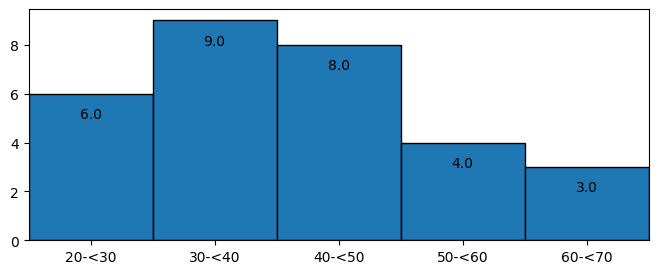

In [11]:
xvalues = ['20-<30','30-<40','40-<50','50-<60','60-<70']
plt.margins(x=0)
bar = plt.bar(xvalues,age_df['Count'][:-1].values,ec="k",width=1)
lables = plt.bar_label(bar,labels=age_df['Count'][:-1].values,padding=-20)

#### Cumulative Frequency Distribution
- a summary table of cumulative frequency counts
- used to answer questions of a ‘more than’ or ‘less than’ nature.

In [12]:
#create intervals of age
bins = pd.interval_range(0, 2400, freq=400,closed="left")
spend_df = pd.cut(grocery_df['Spend'], bins).value_counts()
#sort series
sf = spend_df.sort_index(ascending=True)
#create new dataframe
spend_df = pd.DataFrame({'Grocery Spend (R)':sf.index, 'Count':sf.values})
spend_df.set_index('Grocery Spend (R)', inplace=True)
spend_df['Cumulative Frequency'] = spend_df['Count'].cumsum()
spend_df['Percentage']= np.round(spend_df['Cumulative Frequency']/spend_df['Count'].sum()*100,1)
spend_df

,Count,Cumulative Frequency,Percentage
Grocery Spend (R),,,
"[0, 400)",0,0,0.0
"[400, 800)",7,7,23.3
"[800, 1200)",14,21,70.0
"[1200, 1600)",5,26,86.7
"[1600, 2000)",3,29,96.7
"[2000, 2400)",1,30,100.0


##### Ogive 
- A graph of a cumulative frequency distribution.
- Provides answers for both less than and more than type of questions from the same graph.

Text(0.5, 1.0, 'Ogive')

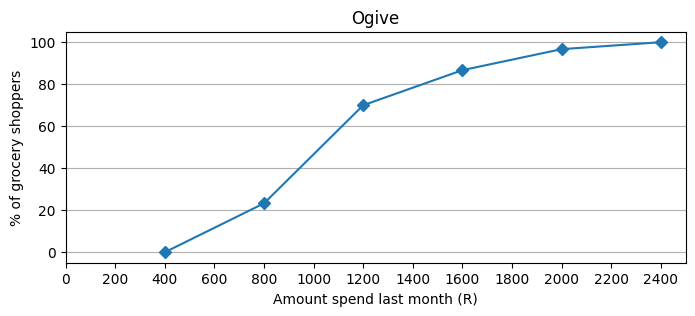

In [13]:
plt.plot(np.arange(400,2800,400),spend_df['Percentage'].values, marker = 'D')
plt.grid(axis = 'y')
plt.xticks(np.arange(0,2500,200))
plt.xlabel("Amount spend last month (R)")
plt.ylabel("% of grocery shoppers")
plt.title("Ogive")

### Summarizing single numerical variables
graphs used to display the relationship between two numeric variables are:
- scatter plot
- trendline graph
-  Lorenz curve

#### Scatter plot
- displays the data points of two numeric variables on an x–y graph
- shows the relationship between the two variables in terms of:
    - its strength (the closeness of the points), 
    - its shape (linear or curved), 
    - its direction (direct or inverse) 
    - outliers (extreme data values).


In [14]:
grocery_df[['Visits', 'Spend']].head()

,Visits,Spend
0,3,946
1,5,1842
2,3,885
3,4,1332
4,3,744


Text(0, 0.5, 'Amount spent last month (R)')

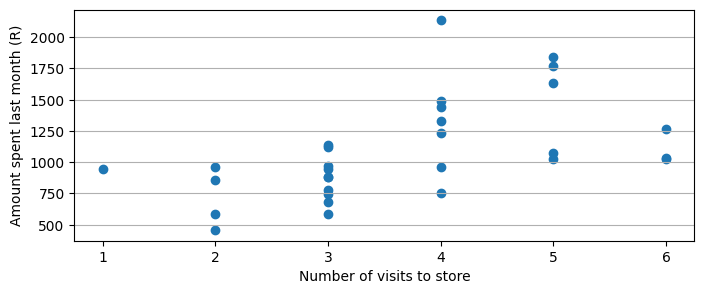

In [15]:
visits = grocery_df['Visits'].values
spend = grocery_df['Spend'].values
plt.grid(axis = 'y')
plt.scatter(visits, spend)
plt.xlabel("Number of visits to store")
plt.ylabel("Amount spent last month (R)")

#### Trendline Graph
- Plots values of a numeric variable over time(time series data) where,
    - x-axis: plots time
    - y-axis: numeric variable

In [16]:
factory_df = pd.read_excel('data/factory_absent.xlsx')
factory_df.head()

,Week,Absent
0,1,54
1,2,58
2,3,94
3,4,70
4,5,61


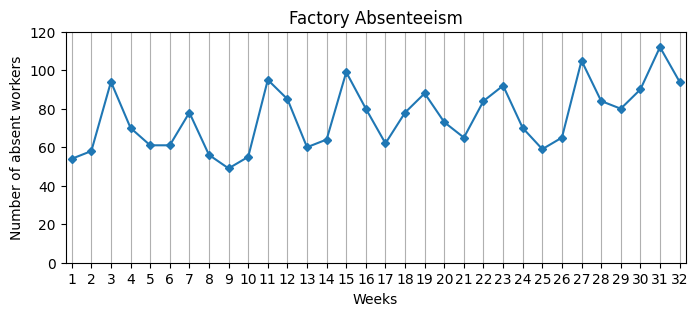

In [17]:
plt.plot(factory_df['Week'].values,factory_df['Absent'].values, marker = 'D',ms=4)
plt.yticks(np.arange(0,140,20))
plt.margins(x=0.01)
plt.xticks(np.arange(1,33,1))
plt.grid(axis='x')
plt.ylabel("Number of absent workers")
plt.xlabel("Weeks")
_ = plt.title("Factory Absenteeism")

#### Lorenz curve
- plots ogives of two numeric variables against each other.
- show the degree of inequality between the values of the two variables.
    - what percentage of one numeric measure  is accounted for by given percentages of the
      other numeric measure
      
Can be used to show the relationship between:
- the value of inventories against the volume of inventories held by an organisation
- the spread of the total salary bill amongst the number of employees in a company
- the concentration of total assets amongst the number of companies in an industry
- the spread of the taxation burden amongst the total number of taxpayers.

The more unequal the two distributions, the more bent (concave or convex) the curve becomes.

A Lorenz curve always starts at coordinate (0%; 0%) and ends at coordinate (100%; 100%).

If the distributions are similar or equal, the Lorenz curve will result in a 45° line (line of uniformity) from<br>
the origin of both axes

In [18]:
data = {
    "Savings Balances (R)": ["Below 0","[0,500)","[500,1000)","[1000,3000)","[3000,5000)","[5000,10000)"],
    "Number of savers": [0,12,18,25,6,3],
    "Total savings (R)": [0,4089,14022,35750,24600,22542],
}
savings_df = pd.DataFrame(data)
savings_df.set_index('Savings Balances (R)', inplace=True)
savings_df

,Number of savers,Total savings (R)
Savings Balances (R),,
Below 0,0,0
"[0,500)",12,4089
"[500,1000)",18,14022
"[1000,3000)",25,35750
"[3000,5000)",6,24600
"[5000,10000)",3,22542


In [19]:
# spend_df['Cumulative Frequency'] = spend_df['Count'].cumsum()
savings_df['Percentage of savers']= np.round(
    savings_df['Number of savers'].cumsum()/savings_df['Number of savers'].sum()*100,0
)
savings_df['Percentage of total savings']= np.round(
    savings_df['Total savings (R)'].cumsum()/savings_df['Total savings (R)'].sum()*100,0
)
savings_df

,Number of savers,Total savings (R),Percentage of savers,Percentage of total savings
Savings Balances (R),,,,
Below 0,0,0,0.0,0.0
"[0,500)",12,4089,19.0,4.0
"[500,1000)",18,14022,47.0,18.0
"[1000,3000)",25,35750,86.0,53.0
"[3000,5000)",6,24600,95.0,78.0
"[5000,10000)",3,22542,100.0,100.0


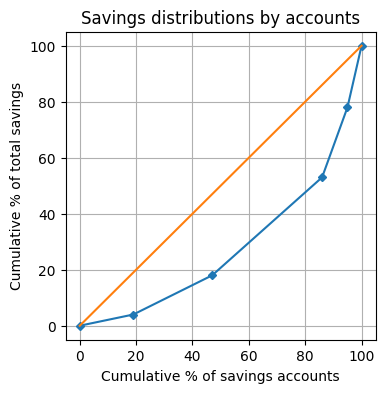

In [20]:
plt.figure(figsize=(4,4))
plt.grid()
plt.plot(
    savings_df['Percentage of savers'].values,
    savings_df['Percentage of total savings'].values, marker = 'D',ms=4
)
plt.plot([0,100],[0,100])
plt.ylabel("Cumulative % of total savings")
plt.xlabel("Cumulative % of savings accounts")
_ = plt.title("Savings distributions by accounts")

## The Pareto Curve
- A combination of a sorted bar chart and a cumulative categorical frequency table
- In a sorted bar chart the categories on the x-axis are placed in decreasing order of frequency.
- It graphically identifies and separates the ‘critical few’ problems from the ‘trivial many’ problems    

### Example
A customer service manager has analysed 300 customer complaints received over the past year <br>
into eight categories, as shown in the table below

In [21]:
data = {
    "Code": np.linspace(1,8,8, dtype=int),
    "Description": [
        "Poor product knowledge",
        "Product options limited",
        "Internet site frequently down",
        "Slow response times",
        "Unfriendly staff",
        "Non-reply to queries",
        "Cost of service is excessive ",
        "Payment options limited "
    ],
    "Count": [26,47,12,66,15,22,82,30]
}
complaints_df = pd.DataFrame(data)
complaints_df.sort_values(by="Count",ascending=False,inplace=True)
complaints_df['Cumulative Count'] = complaints_df['Count'].cumsum()
complaints_df['Cumulative Percent']= np.round(complaints_df['Cumulative Count']/complaints_df['Count'].sum()*100,0)

complaints_df

,Code,Description,Count,Cumulative Count,Cumulative Percent
6,7,Cost of service is excessive,82,82,27.0
3,4,Slow response times,66,148,49.0
1,2,Product options limited,47,195,65.0
7,8,Payment options limited,30,225,75.0
0,1,Poor product knowledge,26,251,84.0
5,6,Non-reply to queries,22,273,91.0
4,5,Unfriendly staff,15,288,96.0
2,3,Internet site frequently down,12,300,100.0


##### Questions
1. From a Pareto curve, identify the top three customer complaints.
2. What percentage of all complaints received do these top three complaints represent?
3. What is the least important complaint and what percentage of customers complained about this issue?

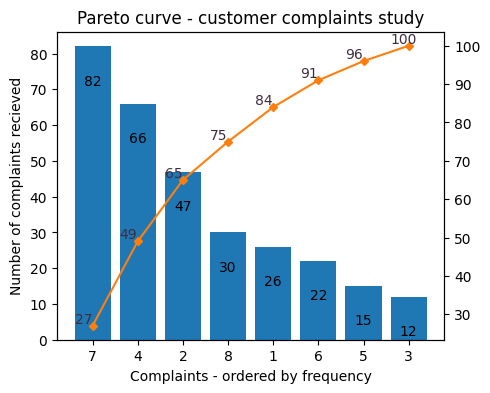

In [22]:
fig, ax = plt.subplots(figsize=(5,4))
x = np.linspace(1,8,8, dtype=int)
bar = ax.bar(x,complaints_df["Count"].values)
_ = plt.xticks(x, complaints_df["Code"].values)
_ = plt.bar_label(bar,labels=complaints_df["Count"].values,padding=-30 ) 
plt.ylabel("Number of complaints recieved")
plt.xlabel("Complaints - ordered by frequency")
_ = plt.title("Pareto curve - customer complaints study")

ax2 = ax.twinx()
y =  complaints_df['Cumulative Percent'].values.astype(int)
ax2.plot(x,y, marker = 'D',ms=4,color="C1")

for i in range(len(x)):
    plt.annotate(y[i], (x[i]-0.4, y[i] + 0.7),color="#3f2d3f")
    

##### Answers
1. Top three complaints are:
    1. Cost of service is excessive (7)
    2. Slow response times (4)
    3. Product options limited (2)
2. Percentages are: 
    1. Cost of service is excessive: 27%
    2. Slow response times: 49 -27 = 22%
    3. Product options limited 65-49 = 16%
    - These top three account for 65% of complaints
3. Least least important complaint is Internet site frequently down(3) with 100-96=4%



## References

Wegner, T. 2013. *Applied Business Statistics: Methods and Excel-based Applications 3<sup>rd</sup>ed.* Claremont, SA:Juta and Company Ltd.